# Homework 4

January 28, 2021

#### 1. Continue working on Problem 1b by playing with the functional nature of time.  Can’t ever have enough margarine.

In [60]:
library(car)
library(ez)
library(tidyr)
library(nlme)
library(lme4)
library(lmerTest)
library(lattice)
library(dplyr)


Attaching package: ‘dplyr’

The following object is masked from ‘package:nlme’:

    collapse

The following object is masked from ‘package:car’:

    recode

The following objects are masked from ‘package:stats’:

    filter, lag

The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union



In [30]:
chol_wide = read.csv('data_files//chlo2_dat.txt')
chol_wide$ID = as.factor(chol_wide$ID)
chol_wide$Margarine = as.factor(chol_wide$Margarine)
head(chol_wide)
dim(chol_wide)

ID,Before,After4weeks,After8weeks,Margarine
1,6.42,5.83,5.75,B
2,6.76,6.20,6.13,A
3,6.56,5.83,5.71,B
4,4.80,4.27,4.15,A
5,8.43,7.71,7.67,B
6,7.49,7.12,7.05,A


[1] 18  5

ID,Margarine,phase,measurement
1,B,1,6.42
2,A,1,6.76
3,B,1,6.56
4,A,1,4.80
5,B,1,8.43
6,A,1,7.49


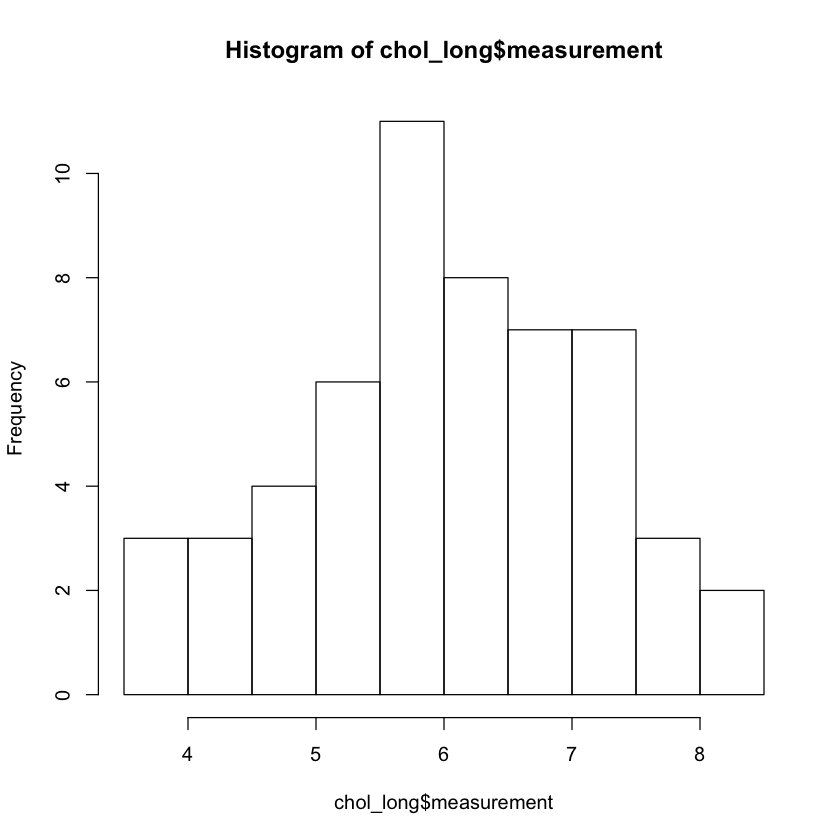

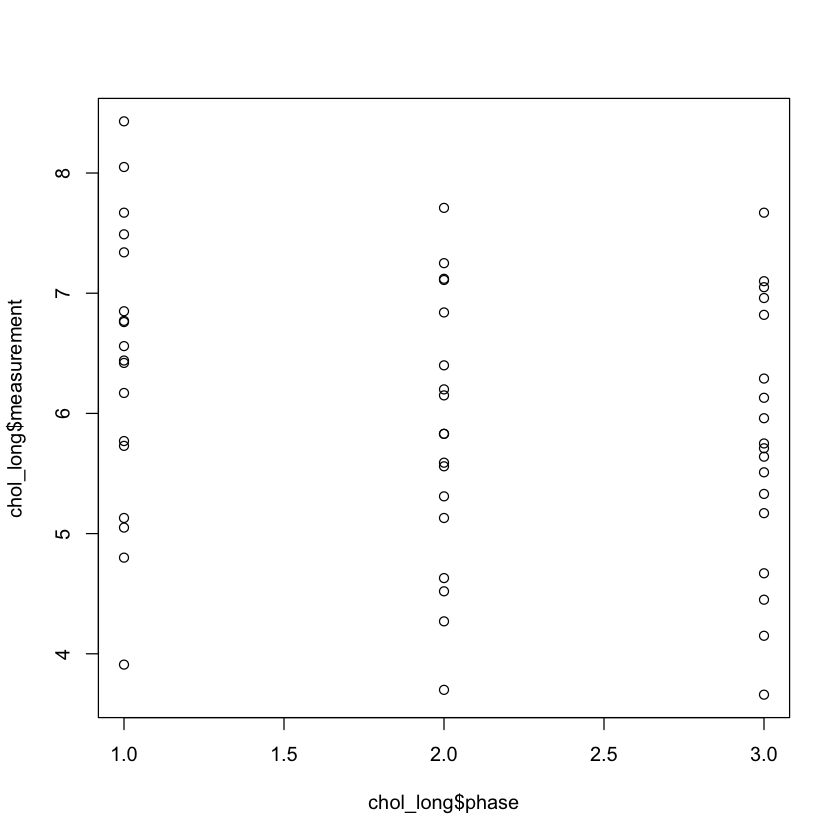

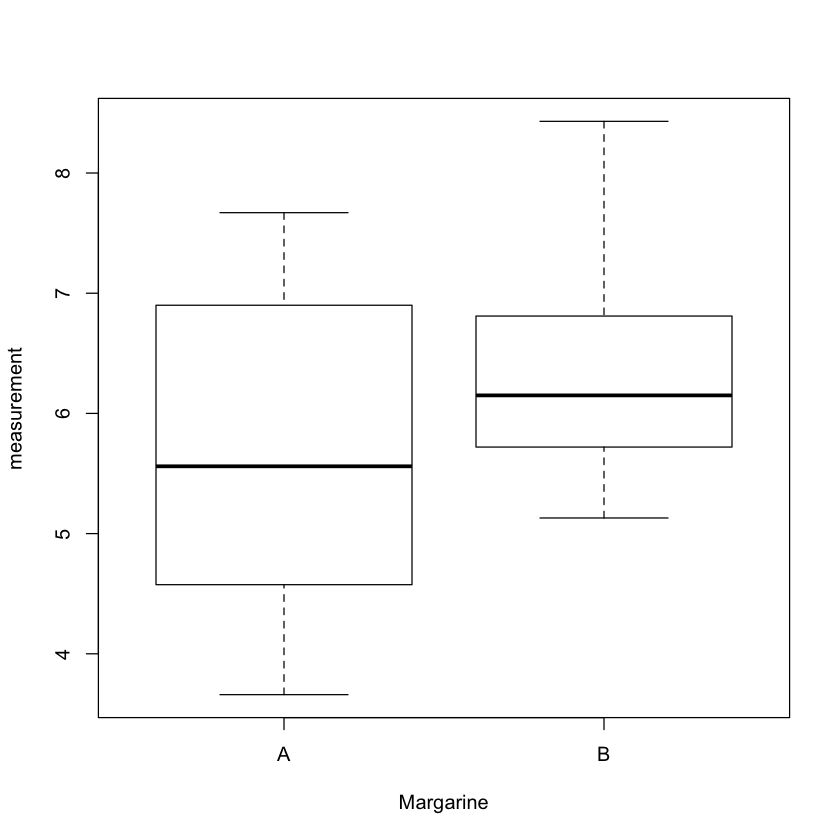

In [31]:
# make long format
chol_long <- gather(chol_wide, phase, measurement, Before:After8weeks, factor_key=TRUE)
chol_long$phase = as.numeric(chol_long$phase)
head(chol_long)
hist(chol_long$measurement)
plot(chol_long$measurement ~ chol_long$phase)
boxplot(measurement ~ Margarine, data=chol_long)

In [32]:
# look at covariance structure across trials
var(chol_wide[2:4])
cor(chol_wide[2:4])
dim(chol_long)

,Before,After4weeks,After8weeks
Before,1.418689,1.328204,1.300515
After4weeks,1.328204,1.261921,1.235584
After8weeks,1.300515,1.235584,1.214210


,Before,After4weeks,After8weeks
Before,1.0000000,0.9926706,0.9908885
After4weeks,0.9926706,1.0000000,0.9981812
After8weeks,0.9908885,0.9981812,1.0000000


[1] 54  4

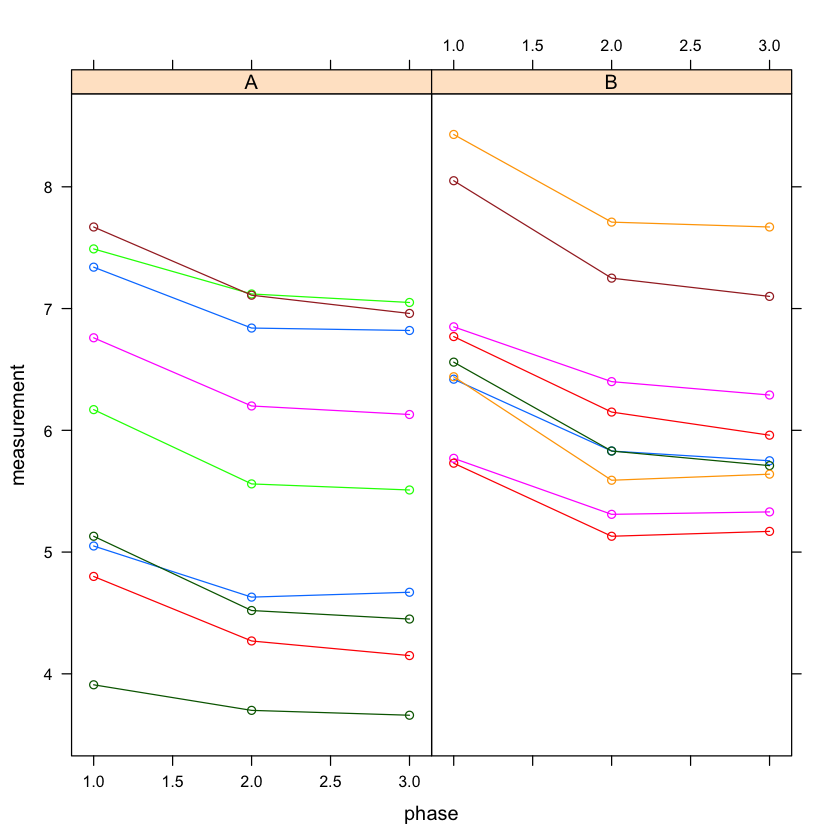

In [33]:
par(cex = .6)
xyplot(measurement ~ phase | Margarine, data = chol_long, groups = ID,
       type = "o", panel = panel.superpose)

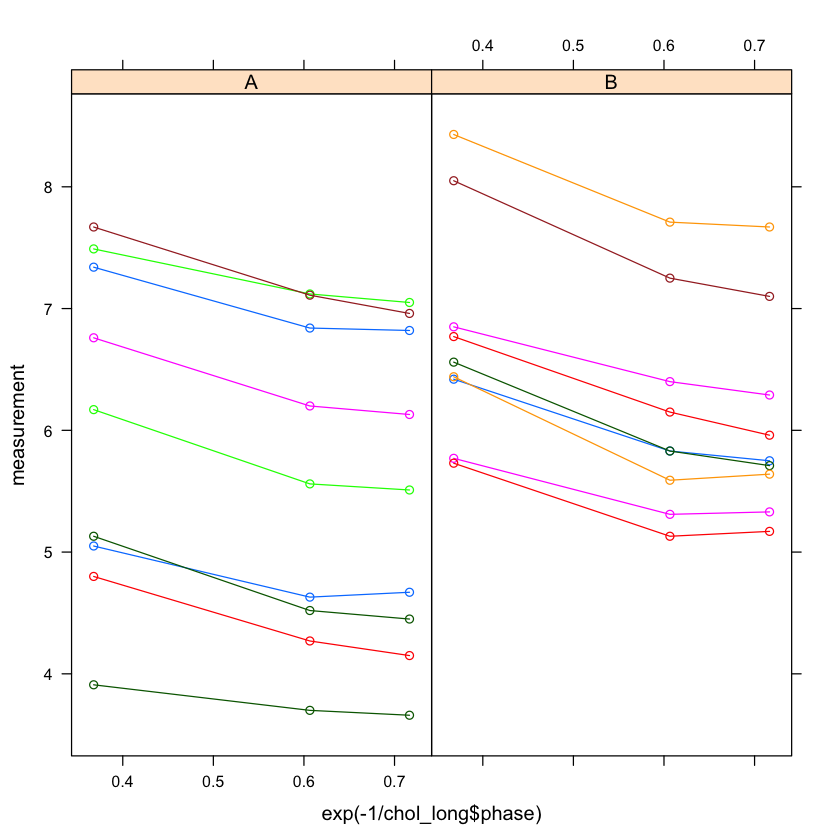

In [34]:
#looks like this might be exponential decay
par(cex = .6)
xyplot(measurement ~ exp(-1/chol_long$phase) | Margarine, data = chol_long, groups = ID,
       type = "o", panel = panel.superpose)

In [35]:
# where we left off last time
# run a linear mixed effects model allowing for random intercepts and slopes per subject
marg_lmer = lmer(measurement ~ as.numeric(phase) * Margarine + (1 |ID) , data = chol_long, REML = F)  # REML = T for comparison)
summary(marg_lmer)

Linear mixed model fit by maximum likelihood . t-tests use Satterthwaite's
  method [lmerModLmerTest]
Formula: measurement ~ as.numeric(phase) * Margarine + (1 | ID)
   Data: chol_long

     AIC      BIC   logLik deviance df.resid 
    59.6     71.6    -23.8     47.6       48 

Scaled residuals: 
    Min      1Q  Median      3Q     Max 
-1.7830 -0.8329  0.1077  0.7028  1.3947 

Random effects:
 Groups   Name        Variance Std.Dev.
 ID       (Intercept) 1.10897  1.0531  
 Residual             0.02903  0.1704  
Number of obs: 54, groups:  ID, 18

Fixed effects:
                             Estimate Std. Error       df t value Pr(>|t|)    
(Intercept)                   6.23815    0.36159 19.89011  17.252 1.97e-13 ***
as.numeric(phase)            -0.27333    0.04016 36.00000  -6.806 5.90e-08 ***
MargarineB                    0.80037    0.51136 19.89011   1.565    0.133    
as.numeric(phase):MargarineB -0.08222    0.05679 36.00000  -1.448    0.156    
---
Signif. codes:  0 ‘***’ 0.001 ‘**

In [36]:
# looks more linear after the exponential transformation, so we'll transform it
chol_long$phase <- exp(-1/chol_long$phase)

In [37]:
model_exp <- lmer(measurement ~ phase * Margarine + (1 + phase|ID) , data = chol_long, REML = F)
summary(model_exp) 

Linear mixed model fit by maximum likelihood . t-tests use Satterthwaite's
  method [lmerModLmerTest]
Formula: measurement ~ phase * Margarine + (1 + phase | ID)
   Data: chol_long

     AIC      BIC   logLik deviance df.resid 
    33.0     48.9     -8.5     17.0       46 

Scaled residuals: 
     Min       1Q   Median       3Q      Max 
-1.92404 -0.73593 -0.05166  0.81892  1.48072 

Random effects:
 Groups   Name        Variance Std.Dev. Corr 
 ID       (Intercept) 1.34130  1.1581        
          phase       0.03303  0.1817   -1.00
 Residual             0.01240  0.1114        
Number of obs: 54, groups:  ID, 18

Fixed effects:
                 Estimate Std. Error      df t value Pr(>|t|)    
(Intercept)        6.6176     0.3955 18.0176  16.734 2.01e-12 ***
phase             -1.6431     0.1592 28.3658 -10.318 4.15e-11 ***
MargarineB         0.9202     0.5593 18.0176   1.645   0.1172    
phase:MargarineB  -0.5044     0.2252 28.3658  -2.240   0.0331 *  
---
Signif. codes:  0 ‘***’ 0.00

#### 2.  Enclosed are the birth weights of newborn rats.  Mothers were given a drug that was expected to reduce the weight of the litter.  There were three conditions: a control (placebo), a low dose of the drug, or a high dose of the drugs.  Generally, female pups are lighter than male pups.  Was the drug effective?  Data are in the file “birthweight.csv”.  Be a bit cautious – this problem has an element that’s a bit different from ones we have dealt with typically but I believe you can handle it.

In [38]:
rat = read.csv('data_files//birthweight.csv')
dim(rat)
head(rat)

[1] 322   6

weight,sex,Litter,Lsize,Treatment,id
6.60,Male,1,12,Control,1
7.40,Male,1,12,Control,2
7.15,Male,1,12,Control,3
7.24,Male,1,12,Control,4
7.10,Male,1,12,Control,5
6.04,Male,1,12,Control,6


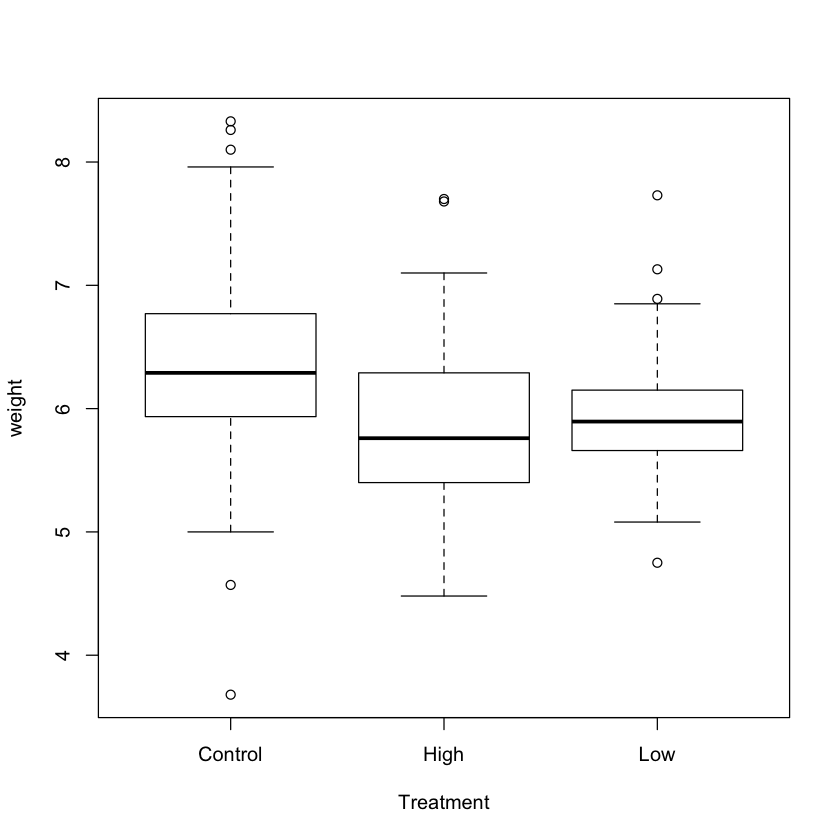

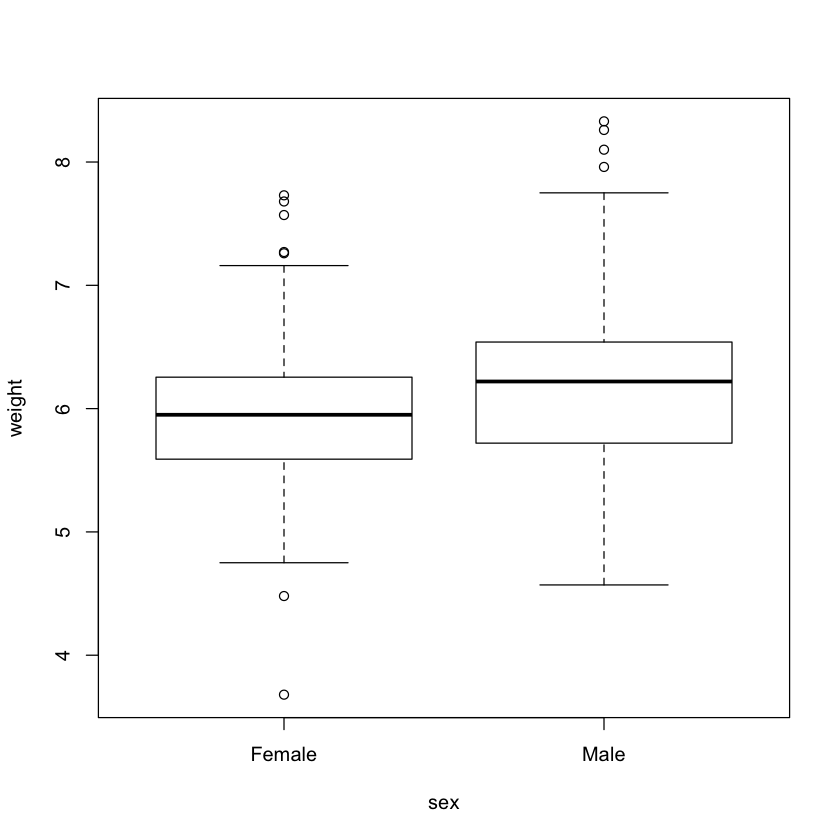

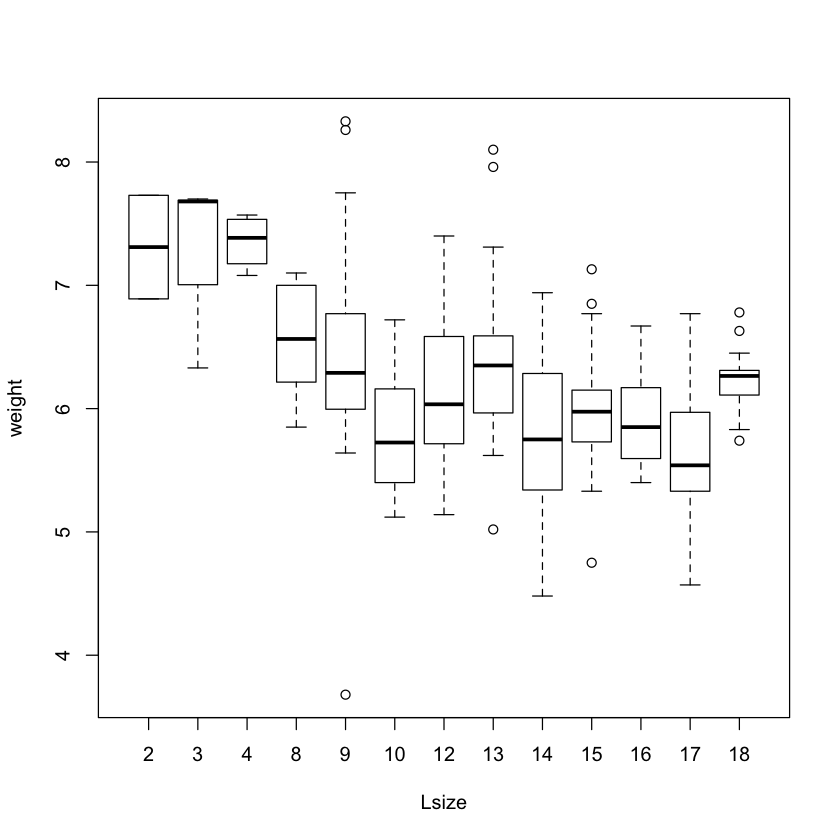

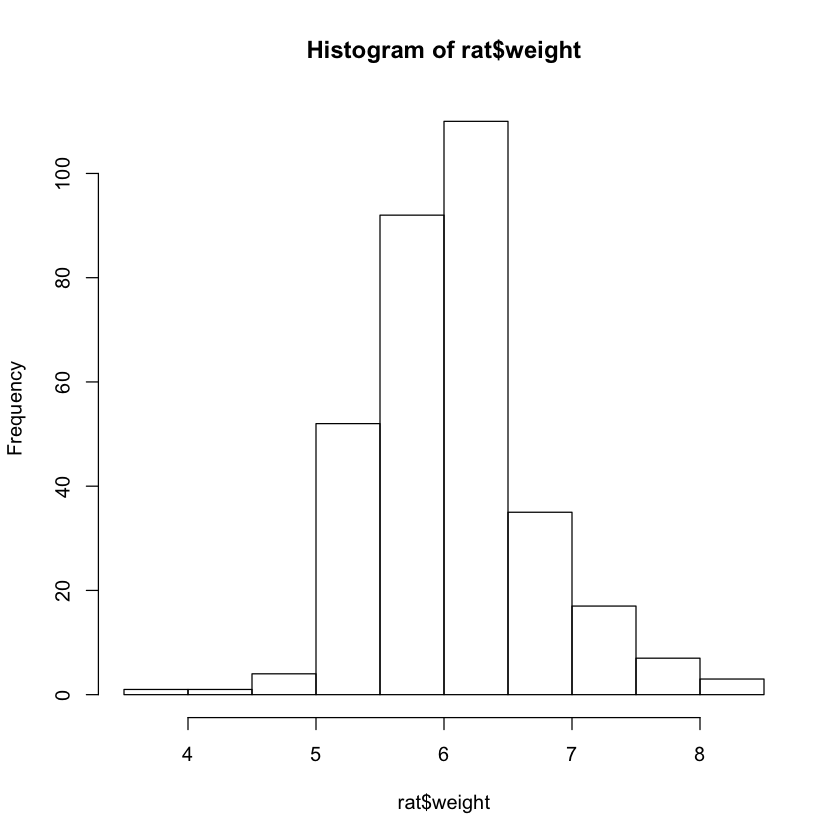

In [73]:
boxplot(weight ~ Treatment, data = rat)
boxplot(weight ~ sex, data = rat)
boxplot(weight ~ Lsize, data = rat)
hist(rat$weight)

It looks like the mean weights aren't obviously significantly different between treatment, sex, or litter size, although it does look like weight may decrease with litter size. The mean weights also appear to approximately normally distributed.

In [77]:
# look at means across groups
aggregate(weight ~ Lsize, data=rat, mean)
aggregate(weight ~ sex, data=rat, mean)
aggregate(weight ~ Treatment, data=rat, mean)

Lsize,weight
2,7.310000
3,7.236667
4,7.355000
8,6.563750
9,6.421481
10,5.785500
12,6.163056
13,6.375962
14,5.819821
15,5.982333


sex,weight
Female,5.940132
Male,6.205322


Treatment,weight
Control,6.324733
High,5.885538
Low,5.928333


In [79]:
#variances
# look at means across groups
aggregate(weight ~ Lsize, data=rat, var)
aggregate(weight ~ sex, data=rat, var)
aggregate(weight ~ Treatment, data=rat, var)

Lsize,weight
2,0.35280000
3,0.61663333
4,0.05003333
8,0.20796964
9,0.86904387
10,0.23374184
12,0.36962754
13,0.33805592
14,0.33257633
15,0.20521851


sex,weight
Female,0.3442706
Male,0.4545356


Treatment,weight
Control,0.5542990
High,0.4142970
Low,0.1821996


In [87]:
rat %>% count(Treatment)

Treatment,n
Control,131
High,65
Low,126


It looks like the variances change substantially between control, high, and low, so it seems like a better idea to run a linear regression with contrasts instead of an anova. There is also a pretty big difference in the size of the groups, with the high group only have about half the samples of the control and low groups. However, There are still 65 observations for that group, so hopefully it's ok.

In [82]:
# linear model with DV weight, sex, Litter, and Treatment as factors as IVs, and Lsize as continuous covariate
contrasts(rat$Treatment) = contr.poly(3)
rat_mod = lm(weight ~ Treatment + as.factor(sex) + Litter + as.numeric(Lsize), data=rat)
summary(rat_mod)


Call:
lm(formula = weight ~ Treatment + as.factor(sex) + Litter + as.numeric(Lsize), 
    data = rat)

Residuals:
     Min       1Q   Median       3Q      Max 
-3.15236 -0.27283 -0.00683  0.32429  1.50556 

Coefficients:
                   Estimate Std. Error t value Pr(>|t|)    
(Intercept)         7.35092    0.19533  37.633  < 2e-16 ***
Treatment.L        -0.38107    0.08529  -4.468 1.10e-05 ***
Treatment.Q         0.69359    0.13185   5.261 2.65e-07 ***
as.factor(sex)Male  0.28039    0.05661   4.953 1.19e-06 ***
Litter              0.01152    0.01041   1.107    0.269    
as.numeric(Lsize)  -0.12670    0.01033 -12.265  < 2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.5008 on 316 degrees of freedom
Multiple R-squared:  0.4109,	Adjusted R-squared:  0.4016 
F-statistic: 44.08 on 5 and 316 DF,  p-value: < 2.2e-16


From this model it appears that there are both significant linear and quadratic effects of treatment on weight. This also shows that weights are significantly different by sex and litter size. However, litter was not significant.